<a href="https://colab.research.google.com/github/tanisaur/forumla1-mini-sprint/blob/tanisha/pratice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/tanisaur/forumla1-mini-sprint.git


Cloning into 'forumla1-mini-sprint'...
remote: Enumerating objects: 70, done.
remote: Counting objects: 100% (70/70), done.
remote: Compressing objects: 100% (67/67), done.
remote: Total 70 (delta 26), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (70/70), 5.88 MiB | 3.30 MiB/s, done.
Resolving deltas: 100% (26/26), done.


In [2]:
import pandas as pd


In [31]:
# prompt: combine csv files driver_standings.csv and drivers on the following columns 'driverId','driverRef','driverStandingsId','raceId','points','position','wins' then name the new pandas database combined_driver info

import pandas as pd

# Read the CSV files
drivers_standings = pd.read_csv("/content/forumla1-mini-sprint/driver_standings.csv")
drivers = pd.read_csv("/content/forumla1-mini-sprint/drivers.csv")


drivers = drivers[["driverId", "driverRef", "nationality"]]
driver_standings = drivers_standings[['driverId','raceId','driverStandingsId', 'points', 'position', 'wins']]
# Merge the DataFrames on the specified columns
combined_driver_info = pd.merge(drivers_standings, drivers, on=['driverId'])

# Display the combined DataFrame
combined_driver_info


,driverStandingsId,raceId,driverId,points,position,positionText,wins,driverRef,nationality
0,1,18,1,10.0,1,1,1,hamilton,British
1,9,19,1,14.0,1,1,1,hamilton,British
2,27,20,1,14.0,3,3,1,hamilton,British
3,48,21,1,20.0,2,2,1,hamilton,British
4,69,22,1,28.0,3,3,1,hamilton,British
...,...,...,...,...,...,...,...,...,...
34119,72077,1106,858,0.0,20,20,0,sargeant,American
34120,72117,1107,858,0.0,19,19,0,sargeant,American
34121,72137,1108,858,0.0,19,19,0,sargeant,American
34122,72157,1109,858,0.0,19,19,0,sargeant,American


In [68]:
# prompt: use races.csv to create a new dataframe called driver_stats only include data where column year = 2023

races = pd.read_csv("/content/forumla1-mini-sprint/races.csv")
races_2023 = races[races['year'] == 2023]
races_2023 = races_2023[['raceId','year','circuitId','name']]
races_2023


,raceId,year,circuitId,name
1079,1098,2023,3,Bahrain Grand Prix
1080,1099,2023,77,Saudi Arabian Grand Prix
1081,1100,2023,1,Australian Grand Prix
1082,1101,2023,73,Azerbaijan Grand Prix
1083,1102,2023,79,Miami Grand Prix
1084,1104,2023,6,Monaco Grand Prix
1085,1105,2023,4,Spanish Grand Prix
1086,1106,2023,7,Canadian Grand Prix
1087,1107,2023,70,Austrian Grand Prix
1088,1108,2023,9,British Grand Prix


In [69]:
# prompt: combine the following dataframes driver_stats and combined_driver_info name it new_dataset


new_dataset = pd.merge(combined_driver_info,races_2023, on='raceId')
new_dataset.head(100)


,driverStandingsId,raceId,driverId,points,position,positionText,wins,driverRef,nationality,year,circuitId,name
0,72010,1098,1,10.0,5,5,0,hamilton,British,2023,3,Bahrain Grand Prix
1,72008,1098,4,15.0,3,3,0,alonso,Spanish,2023,3,Bahrain Grand Prix
2,72006,1098,830,25.0,1,1,1,max_verstappen,Dutch,2023,3,Bahrain Grand Prix
3,72013,1098,822,4.0,8,8,0,bottas,Finnish,2023,3,Bahrain Grand Prix
4,72020,1098,807,0.0,15,15,0,hulkenberg,German,2023,3,Bahrain Grand Prix
...,...,...,...,...,...,...,...,...,...,...,...,...
95,71956,1102,852,2.0,16,16,0,tsunoda,Japanese,2023,79,Miami Grand Prix
96,71961,1102,855,2.0,15,15,0,zhou,Chinese,2023,79,Miami Grand Prix
97,71959,1102,856,0.0,20,20,0,de_vries,Dutch,2023,79,Miami Grand Prix
98,71965,1102,857,4.0,14,14,0,piastri,Australian,2023,79,Miami Grand Prix


In [71]:
# prompt: from new_dataset find which driverRef had the most wins

most_wins_driver = new_dataset.groupby('driverRef')['wins'].sum().sort_values(ascending=False).index[0]
print(f"Driver with the most wins in 2023: {most_wins_driver}")


Driver with the most wins in 2023: max_verstappen


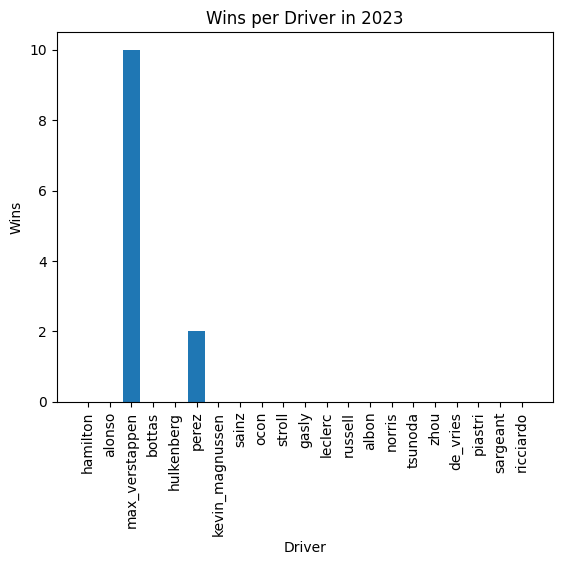

In [45]:
# prompt: create a data chart to show from new_dataset listing driverRef on x-axis and wins on y-axis

import matplotlib.pyplot as plt

# Extract data for the chart
driver_names = new_dataset['driverRef'].tolist()
wins = new_dataset['wins'].tolist()

# Create the bar chart
plt.bar(driver_names, wins)
plt.xlabel("Driver")
plt.ylabel("Wins")
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.title("Wins per Driver in 2023")
plt.show()
